# Optimization with random initialization

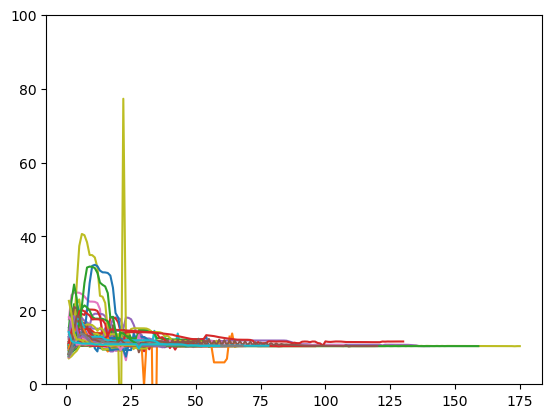

True
optimal design variable:
   capture_width      83.172 [m]
   pen_diameter       24.369 [m]
   pen_height          3.000 [m]
   spacing           238.608 [m]
   stock_density      30.000 [kg/m^3]
   pen_depth          16.361 [m]
   es_size          5000.000 [kWh]
   num_pens           20.000 [-]
----------------------------------------
optimal objective function terms:
   cost_per_yield     10.385 [$/kg]
   price          7410940.050 [$]
   fish_yield     713598.299 [kg]
----------------------------------------
optimal WEC rated power:
   P_rated        1485.704 [kW]
----------------------------------------
optimal Port to deployment location distance:
   distance         284.652 [km]
----------------------------------------
optimal price break down:
   wec price            1573393.026 [$]
   pen price            2798424.702 [$]
   fish feed price      1428875.653 [$]
   energy st price      1355000.000 [$]
   vessel travel price  255246.669 [$]
------------------------------------

In [2]:
import modules
from modules import Aqua_Obj
import optimization
from utilities import *
import numpy as np
import importlib
importlib.reload(modules)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sim_wecpen import *

all_vars = ['x_wec','x_type_wec','x_pen', 'x_disc_pen', 'p_pen','x_env','p_wec','p_fish_salmon', 'x_es', 'p_es', 'pos_env', 'p_vessel']
# with wave real data
all_vars = all_vars  + ['p_wave_vec']
# with wave average data
#all_vars = all_vars  + ['x_wave_ave']

fig, ax = plt.subplots(1,1)
opt_res_history = []
cons_history = []
iteration_history = []

args = {}
#args['fixed_num_pen'] = 11 #without cost of travel from shore
args['fixed_num_pen'] = 20  #with cost of travel from shore

x_init, p_init, x, res_best, p_best, op_obj = wecpen_opt(all_vars, args)

iteration = np.linspace(1,max_iter+1,max_iter+1)

for n_test in range(100):
    #set random x0
    x0 = []
    for i0 in range(len(x.bnds)):
        x0.append(np.random.uniform(low=x.bnds[i0][0], high=x.bnds[i0][1]))

    #optimization
    args['x0'] = x0
    x_init, p_init, x, res_best, p_best, op_obj = wecpen_opt(all_vars, args)
    
    ax.plot(iteration, op_obj.f)
    
    opt_res_history.append(op_obj.f)
    iteration_history.append(op_obj.count)
    cons_history.append(op_obj.ineq)

plt.ylim([0, 100])
plt.show()

optimize_result(x.name, x.list, x.unit, res_best, p_best)